In [1]:
from __future__ import division
from IPython.display import display, Math, Latex
from math import sin, cos
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, LinearLocator, NullFormatter, NullLocator, MultipleLocator
import matplotlib.ticker
import matplotlib.colors
from matplotlib.font_manager import FontProperties
from matplotlib import rc, text
from scipy.stats import norm
import scipy as sp
from scipy.integrate import simps
from numpy import trapz
from scipy.optimize import curve_fit
from scipy.special import gamma, factorial

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
c=2.99792458*(10**8)
G=6.67428*(10**(-11))
s_mass=G*(1.98892*10**(30))/(c**3)

# common function shortcuts
log10 = np.log10
pi = np.pi
sqrt = np.sqrt

In [3]:
wzp = -0.029 # Quasar Correction; defined in Bailor-Jones but computed in Lindegren et al. 2018

In [4]:
# Posterior PDF from Bailor-Jones et al. (for DR2)

def pOfR(r, px, dpx, Lsph):
    """
    This is Equation 2 in Bailer-Jones et al. 2018.
    Here, input r in pc's.
    """
    r = r/1000. #convert pc to kpc
   # px = px + 0.029 #Quasar correction
    exponent = -r/Lsph - (px-wzp-1/r)**2/(2*dpx**2)
    ans = r**2*np.exp(exponent)
    return ans

In [19]:
# geometric posterior from Bailor-Jones et al. 2021 (for EDR3)
def pOfR3(r, px, dpx, alpha, beta, L):
    """
    Bailer-Jones et al. 2020 geometric prior
    """
    #r=r/1000
    #distance prior
    exponent2= -(r/L)**alpha
    prior= (1/(gamma((beta+1)/alpha)))*(alpha/(L**(beta+1)))*((r/1000)**beta)*np.exp(exponent2)
    #likelihood (equation 2) 
    exponent3 = (-1/(2*(dpx**2)))*(px--.017-(1/(r/1000)))**2
    P = (1/(dpx*sqrt(2*pi)))*np.exp(exponent3)
    ans=P*prior
    return ans

In [21]:
# plotting preamble

fig_width_pt = 245.27 #513.17           # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

params = {'backend': 'pdf',
        'axes.labelsize': 7,
        'lines.markersize': 2,
        'font.size': 7,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.0,
        'legend.fontsize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'savefig.dpi':200,
        'path.simplify':True,
        #'font.family': 'serif',
        'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True,
        #'axes.color_cycle': ['b', 'lime', 'r', 'purple', 'g', 'c', 'm', 'orange', 'darkblue', \
        #                        'darkcyan', 'y','orangered','chartreuse','brown','deeppink','lightgreen', 'k'],
        #'font.serif':cm,
        'figure.figsize': fig_size}
plt.rcParams.update(params)

# J1732 parallax measurements

In [22]:
#SNR
-0.5351216726306300/2.2160032

-0.24148055049317171

In [23]:
# D_DM calculated with pygedm
# dispersion measure distance from NE 2001
d_DM_NE_1732 = 1411.1648

# YMW 16 DM model
d_DM_YMW_1732 = 1874.6329

In [47]:
pxmax = 500
pxmin = 2000
gx = np.linspace(2, 12000, 100001)# 100000, 100000)

In [48]:
#dx=np.linspace(1, 1000, 1001)

In [49]:
pxGEDR3 = -.53512
pxGEDR3err = 2.216

In [50]:
pxGDR2=-1.1837
pxGDR2err=2.8444

In [51]:
# Corrected Bailer-Jones distance estimate
bj_1732 = []
for r in gx:
    bj_1732.append(pOfR(r,pxGDR2, pxGDR2err,1.94743888544794))
#Lsph=1.94743888544794

In [52]:
#geometric distance in EDR3
alpha =1.64336451693322
beta = 0.955454966826623
L = 5252.8949228854
prior=5813.855

In [53]:
# Gaia EDR3 estimate
EDR3 = []
for xx in gx:
    #EDR3.append(prior3(xx, pxGEDR3, pxGEDR3, prior))
    EDR3.append(pOfR3(xx, pxGEDR3, pxGEDR3err, alpha, beta, L))

In [54]:
areaDR3 = trapz(EDR3, gx)
areabj = simps(bj_1732, gx)
truecombo= EDR3/areaDR3

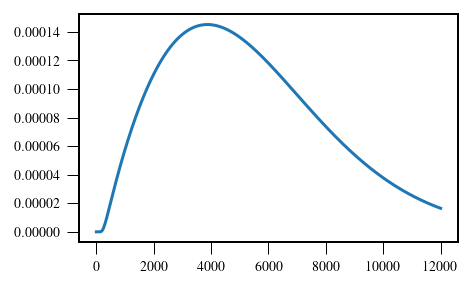

In [55]:
plt.plot(gx, truecombo)

In [61]:
#calculating percentiles
for k in range(0, 200001):
    if k == 0:
        xx95 = gx
        yy95 = truecombo
    else:
        xx95 = gx[0:-k]
        yy95 = truecombo[0:-k]
    v = np.trapz(yy95, xx95)
    if v <= 0.95:
        break
per_95 = xx95[-1]
int_95= yy95[-1]

for k in range(0, 200001):
    if k == 0:
        xx5 = gx
        yy5 = truecombo
    else:
        xx5 = gx[0:-k]
        yy5 = truecombo[0:-k]
    v = np.trapz(yy5, xx5)
    if v <= 0.05:
        break
per_5 = xx5[-1]
int_5= yy5[-1]

for k in range(0, 200001):
    if k == 0:
        xx16 = gx
        yy16 = truecombo
    else:
        xx16 = gx[0:-k]
        yy16 = truecombo[0:-k]
    v = np.trapz(yy16, xx16)
    if v <= 0.16:
        break
per_16 = xx16[-1]
int_16= yy16[-1]

for k in range(0, 200001):
    if k == 0:
        xx84 = gx
        yy84 = truecombo
    else:
        xx84 = gx[0:-k]
        yy84 = truecombo[0:-k]
    v = np.trapz(yy84, xx84)
    if v <= 0.84:
        break
per_84 = xx84[-1]
int_84= yy84[-1]

for k in range(0, 200001):
    if k == 0:
        xx50 = gx
        yy50 = truecombo
    else:
        xx50 = gx[0:-k]
        yy50 = truecombo[0:-k]
    v = np.trapz(yy50, xx50)
    if v <= 0.50:
        break
per_50 = xx50[-1]

print ("16/84:" + str(per_16) + " and "+ str(per_84))
per_50
    

16/84:2433.9946 and 8013.54452


4856.87072

In [62]:
#finding peak value
truecombo.max()
peak=np.where(truecombo==truecombo.max())
gx[peak]

array([3873.7546])

In [65]:
per_5

1392.32824

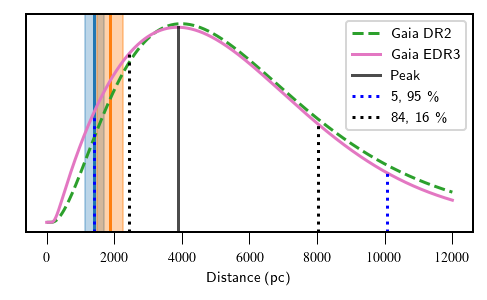

In [73]:
fig, ax1 = plt.subplots()

# DM NE 2001 model
ax1.axvspan(d_DM_NE_1732*.8, d_DM_NE_1732*1.2, alpha=0.3, color = "C0")#, label = "NE 2001")
plt.axvline(d_DM_NE_1732, ymin=0, ymax=1, color = "C0")

# DM YMW16 model
ax1.axvspan(d_DM_YMW_1732*.8, d_DM_YMW_1732*1.2, alpha=0.35, color = "C1")#, label = "YMW 16")
plt.axvline(d_DM_YMW_1732, ymin=0, ymax=1, color = "C1")

# GAIA DR2 distance, 
plt.plot(gx, np.array(bj_1732)/areabj, label = "Gaia DR2", color = "C2", linestyle='dashed')

# Gaia EDR3 distances
plt.plot(gx, truecombo, label = "Gaia EDR3", color = "C6", linestyle='solid')

#percentiles
plt.axvline(gx[peak], ymin=0, ymax=.94, color = "k", label = "Peak", linestyle="-", alpha =.7)
plt.axvline(per_5, ymin=0, ymax=.53, color = "b", label = "5, 95 \%", linestyle=":")
plt.axvline(per_84, ymin=0, ymax=.51, color = "k", label= "84, 16 \%", linestyle=":")
plt.axvline(per_16, ymin=0, ymax=.83, color = "k", linestyle=":")
plt.axvline(per_95, ymin=0, ymax=.29, color = "b", linestyle=":")


ax1.set_yticklabels([])
plt.yticks([])
plt.xlabel("Distance (pc)")
plt.legend()
plt.tight_layout()
#plt.xlim(-10,12000)
plt.savefig("J1732_distances_wbj.pdf")

In [25]:
# log transform
new1732 = []
for ii in EDR3:
    new1732.append(10**(ii))